<a href="https://colab.research.google.com/github/anand-therattil/Boston_House_Price_Prediction/blob/main/Boston_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Modules

In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sn
from sklearn import svm
from pandas.core.common import random_state
from xgboost import XGBRegressor
import sklearn.datasets

Data Loading and Pre-processing

In [2]:
data = sklearn.datasets.load_boston()
data_frame = pd.DataFrame(data.data,columns =data.feature_names)
data_frame.head()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
data_frame['price'] = data.target
data_frame.shape

(506, 14)

### Pre-Processing

In [4]:
#checking if value is missing
data_frame.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [5]:
data_frame.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


####Correlation between varibale

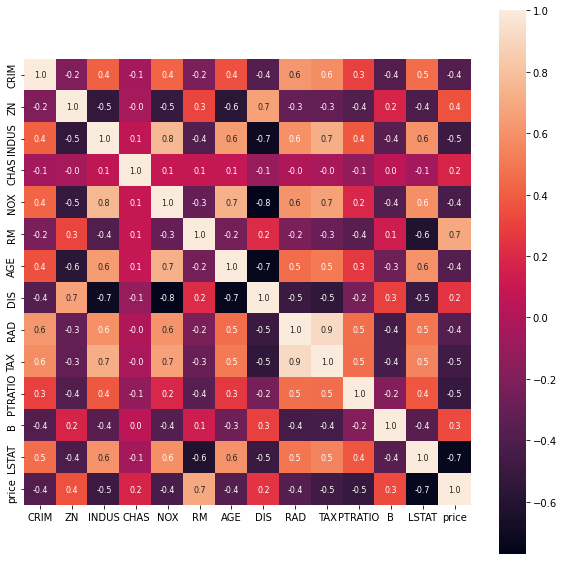

In [6]:
plt.figure(figsize=[10,10])
sn.heatmap(data_frame.corr(),cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8})

Data Splitting 

In [7]:
independent = data_frame.drop(['price'],axis=1)
dependent = data_frame['price']

In [8]:
x_train,x_test,y_train,y_test = train_test_split(independent,dependent,test_size=0.2,random_state=1)

Model Training

XGB Regression Model

In [9]:
model = XGBRegressor()
model.fit(x_train,y_train)

[16:57:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [28]:
from sklearn import metrics
x_train_predict =model.predict(x_train)
r2_error_train = metrics.r2_score(x_train_predict,y_train)
msa_error_train = metrics.mean_absolute_error(x_train_predict,y_train)
print("R2 Error",r2_error_train)
print("MSA ERROR:",msa_error_train)

R2 Error 0.9729452840592877
MSA ERROR: 1.095920478235377


R2 Error 0.8949664268831292
MSA ERROR: 2.2178991551492726


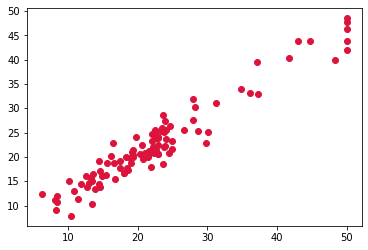

In [29]:
x_test_predict =model.predict(x_test)
r2_error_test = metrics.r2_score(x_test_predict,y_test)
msa_error_test = metrics.mean_absolute_error(x_test_predict,y_test)
print("R2 Error",r2_error_test)
print("MSA ERROR:",msa_error_test)
plt.scatter(y_test, x_test_predict, c='crimson')

Linear Regression Sklearn

In [18]:
model_LR = LinearRegression().fit(x_train, y_train)
x_train_predict_LR= model_LR.predict(x_train)
r2_error_train_LR = metrics.r2_score(x_train_predict_LR,y_train)
msa_error_train_LR = metrics.mean_absolute_error(x_train_predict_LR,y_train)
print(r2_error_train_LR,msa_error_train_LR)

0.6289321478794234 3.1961968073257454


R2 Error: 0.5929702288205366
MSA Error: 3.7507121808389168


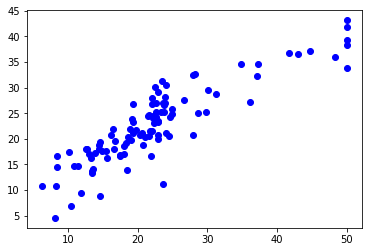

In [30]:
x_test_predict_LR =model_LR.predict(x_test)
r2_error_test_LR = metrics.r2_score(x_test_predict_LR,y_test)
msa_error_test_LR = metrics.mean_absolute_error(x_test_predict_LR,y_test)
print("R2 Error:",r2_error_test_LR)
print("MSA Error:",msa_error_test_LR)
plt.scatter(y_test, x_test_predict_LR, c='blue')

Comparision Between XGBRegression Vs Linear Regression

Text(0.5, 1.0, 'Comparision Between XGBRegression Vs Linear Regression')

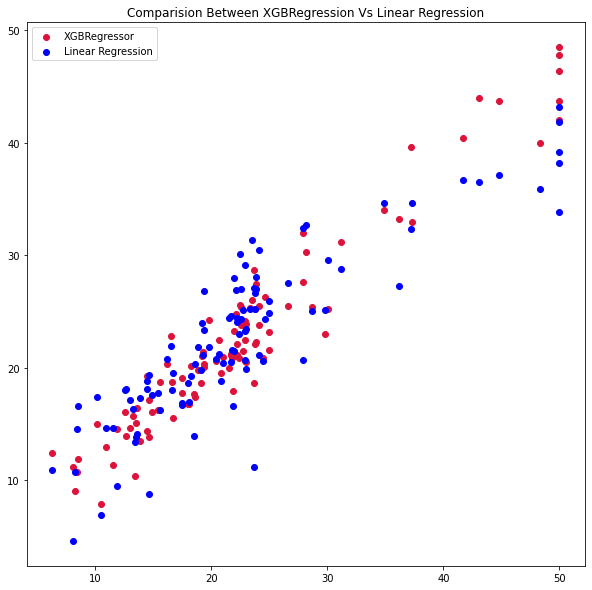

In [33]:
plt.figure(figsize=[10,10])
plt.scatter(y_test, x_test_predict, c='crimson')
plt.scatter(y_test, x_test_predict_LR, c='blue')
plt.legend(["XGBRegressor","Linear Regression"])
plt.title("Comparision Between XGBRegression Vs Linear Regression")